In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def calculate_histogram(image):
    rows, cols = image.shape
    histogram = np.zeros(256, dtype=int)
    
    for i in range(rows):
        for j in range(cols):
            pixel_value = image[i, j]
            histogram[pixel_value] += 1
            
    return histogram

In [3]:
def generate_binary_image(image, threshold):
    rows, cols = image.shape
    binary_image = np.zeros((rows, cols), dtype=np.uint8)
    
    for i in range(rows):
        for j in range(cols):
            binary_image[i, j] = 255 if image[i, j] >= threshold else 0
            
    return binary_image


In [4]:
def calculate_within_class_variance(hist, start, end):
    total_pixels = sum(hist[start:end])
    weighted_sum = sum(i * hist[i] for i in range(start, end))
    mean = weighted_sum / total_pixels
    
    variance = sum((i - mean)**2 * hist[i] for i in range(start, end)) / total_pixels
    return variance

In [5]:
def calculate_optimal_threshold(hist):
    min_within_class_variance = float('inf')
    optimal_threshold = 0
    
    for threshold in range(1, len(hist)):
        within_class_variance_bg = calculate_within_class_variance(hist, 0, threshold)
        within_class_variance_fg = calculate_within_class_variance(hist, threshold, len(hist))
        
        total_pixels = sum(hist)
        weighted_within_class_variance = (
            (within_class_variance_bg * sum(hist[:threshold]) +
             within_class_variance_fg * sum(hist[threshold:])) / total_pixels
        )
        
        if not math.isnan(weighted_within_class_variance) and weighted_within_class_variance < min_within_class_variance:
            min_within_class_variance = weighted_within_class_variance
            optimal_threshold = threshold
            
    return optimal_threshold

In [10]:
def main():
    image_path = 'Seginput.png'
    image = Image.open(image_path).convert("L")
    img_array = np.asarray(image)
    
    histogram = calculate_histogram(img_array)
    
    optimal_threshold = calculate_optimal_threshold(histogram)
    print("Optimal Threshold:", optimal_threshold)
    
    binary_result = generate_binary_image(img_array, optimal_threshold)
    
    plt.imshow(binary_result, cmap='gray')
    plt.savefig("otsu_binary.png")
    plt.show()

C:\Users\bashe\AppData\Local\Temp\ipykernel_884\4210267647.py:4: RuntimeWarning: invalid value encountered in long_scalars
  mean = weighted_sum / total_pixels


Optimal Threshold: 114


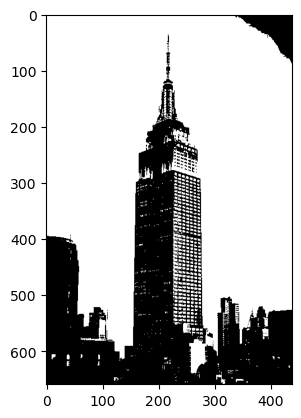

In [11]:
if __name__ == "__main__":
    main()